In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
from nltk import FreqDist

In [2]:
# Carrega corpus

loc = '../discursos'
wordLists = PlaintextCorpusReader(loc, '.*\.txt')
print(wordLists.fileids())

['2020-03-03.txt', '2020-03-04.txt', '2020-03-09.txt', '2020-03-10.txt', '2020-04-17.txt', '2020-04-24.txt', '2020-04-29.txt', '2020-05-21.txt', '2020-06-05.txt', '2020-06-08.txt', '2020-06-09.txt', '2020-06-17.txt', '2020-06-22.txt', '2020-06-25.txt', '2020-06-30.txt', '2020-07-02.txt', '2020-07-16.txt', '2020-07-30.txt', '2020-07-31.txt', '2020-08-05.txt', '2020-08-06.txt', '2020-08-11.txt', '2020-08-12.txt', '2020-08-13.txt', '2020-08-14.txt', '2020-08-15.txt', '2020-08-17.txt', '2020-08-18.txt', '2020-08-19.txt', '2020-08-21.txt', '2020-08-24.txt', '2020-08-25.txt', '2020-08-26.txt', '2020-08-27.txt', '2020-08-29.txt', '2020-09-01.txt', '2020-09-02.txt', '2020-09-03.txt', '2020-09-10.txt', '2020-09-11.txt', '2020-09-16.txt', '2020-09-17.txt', '2020-09-18.txt', '2020-09-19.txt', '2020-09-22.txt']


In [3]:
# Carrega stopwords em português

stop_words = stopwords.words('portuguese')

In [4]:
# Transforma os discursos em type Text e adiciona do dicionário com as chaves name (nome do arquivo)
# e content (texto)

texts = []

for fileid in wordLists.fileids():
    text = nltk.Text(wordLists.words(fileid))
    texts.append({"name": fileid, "content": text})

print(texts)

[{'name': '2020-03-03.txt', 'content': <Text: Discurso do Presidente da República , Jair Bolsonaro...>}, {'name': '2020-03-04.txt', 'content': <Text: Discurso do Presidente da República , Jair Bolsonaro...>}, {'name': '2020-03-09.txt', 'content': <Text: Discurso do Senhor Presidente da República , Jair...>}, {'name': '2020-03-10.txt', 'content': <Text: Discurso do Presidente da República , Jair Bolsonaro...>}, {'name': '2020-04-17.txt', 'content': <Text: Discurso do Presidente da República , Jair Bolsonaro...>}, {'name': '2020-04-24.txt', 'content': <Text: Pronunciamento do Senhor Presidente da República , Jair...>}, {'name': '2020-04-29.txt', 'content': <Text: Discurso do Senhor Presidente da República , Jair...>}, {'name': '2020-05-21.txt', 'content': <Text: Fala do Presidente da República , Jair Bolsonaro...>}, {'name': '2020-06-05.txt', 'content': <Text: Discurso do Presidente da República , Jair Bolsonaro...>}, {'name': '2020-06-08.txt', 'content': <Text: Discurso do Presidente da

In [5]:

# Mostra as 20 palavras mais frequentes em todos os textos e quantas vezes aparece

words_list = []

for fileid in wordLists.fileids():
    for word in wordLists.words(fileid):
        lower_word = word.lower()
        if lower_word.isalpha() and lower_word not in stop_words:
            words_list.append(lower_word)
        
fdist = FreqDist(words_list)
print(fdist.most_common()[:20])

[('brasil', 323), ('aqui', 256), ('todos', 215), ('bem', 142), ('então', 132), ('presidente', 124), ('porque', 124), ('ser', 116), ('momento', 112), ('grande', 110), ('lá', 103), ('ministro', 101), ('governo', 97), ('senhores', 91), ('senhor', 89), ('deus', 88), ('obrigado', 85), ('federal', 84), ('povo', 82), ('agora', 82)]


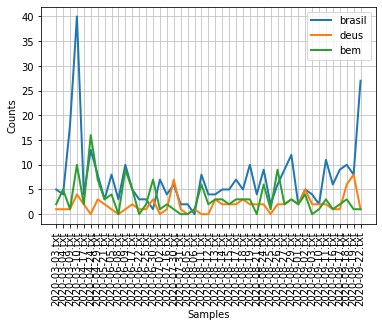

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
# Plotagem da frequência das palavras "brasil", "bem", "deus" em cada discurso

cfd = nltk.ConditionalFreqDist((pal, fileid)
    for fileid in wordLists.fileids()
    for w in wordLists.words(fileid)
    for pal in ["brasil", "bem", "deus"]
    if w.lower() == pal)
cfd.plot()

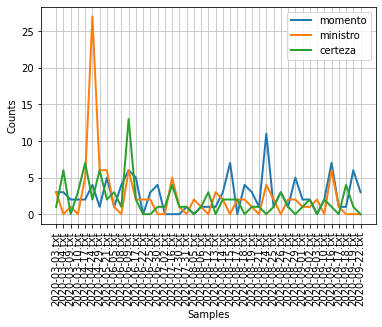

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
# Plotagem da frequência das palavras "momento", "ministro", "certeza" em cada discurso

cfd = nltk.ConditionalFreqDist((pal, fileid)
    for fileid in wordLists.fileids()
    for w in wordLists.words(fileid)
    for pal in ["momento", "ministro", "certeza"]
    if w.lower() == pal)
cfd.plot()

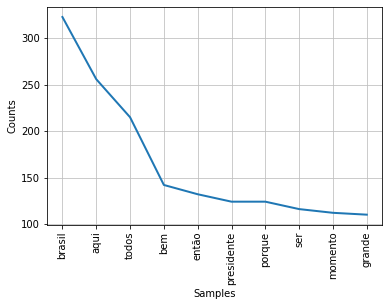

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
# Plotagem da contagem das 10 palavras mais frequentes

fdist.plot(10)

In [9]:
# Mostrar cada ocorrência da palavra "brasil"

for text in texts:
    print(text["name"])
    print(text["content"].concordance('brasil'))
    print("\n")

2020-03-03.txt
Displaying 5 of 5 matches:
outras tantas e tantas regiões pelo Brasil ? É um pedaço de terra do tamanho d
 progresso para todas as regiões do Brasil . Eu quero fazer uma confissão aqui
ão . Já é um recorde na história do Brasil . Para quem não sabe , aqui , a Dam
tas , nós temos que integrar todo o Brasil . E o Brasil todo integrado nos far
os que integrar todo o Brasil . E o Brasil todo integrado nos fará sentir , re
None


2020-03-04.txt
Displaying 4 of 4 matches:
envolvida com o dinheiro público no Brasil . A definição de cultura se resume 
os , eu senti em todos os cantos do Brasil o que o povo queria e , de imediato
s , mas para o bem do nosso querido Brasil . Prezada Regina , bem - vinda , De
arabéns , felicidades , parabéns ao Brasil por essa escolha .
None


2020-03-09.txt
Displaying 18 of 18 matches:
e Abertura de Seminário Empresarial Brasil - Estados Unidos na Flórida - Miami
 as normas de um grande País como o Brasil . E tínhamos ao nosso lado um exemp
 querí

In [10]:
# Mostrar cada ocorrência da palavra "deus"

for text in texts:
    print(text["name"])
    print(text["content"].concordance('deus'))
    print("\n")

2020-03-03.txt
Displaying 1 of 1 matches:
eu devo a minha vida a um milagre de Deus e a eleição , um outro milagre . Nin
None


2020-03-04.txt
Displaying 1 of 1 matches:
sil . Prezada Regina , bem - vinda , Deus te abençoe , e tenho certeza que voc
None


2020-03-09.txt
Displaying 1 of 1 matches:
Armadas e um governo que acredita em Deus . Esse é o grande antídoto contra a 
None


2020-03-10.txt
Displaying 4 of 4 matches:
, abominamos a escravidão , graças a Deus isso não existe mais no Brasil . Mas
o , no meu entender , com a ajuda de Deus e com a ajuda dos demais países , en
tebral das Forças Armadas . Graças a Deus não conseguiram , pela formação patr
teceu na Venezuela . Isso , graças a Deus , no Brasil está vivo , esse sentime
None


2020-04-17.txt
Displaying 2 of 2 matches:
 frente vai nos julgar , e eu peço a Deus que nós dois estejamos certos lá na 
e para todos nós . Parabéns Nelson , Deus te acompanhe , que você seja feliz e
None


2020-04-24.txt
no matches
None


2020-04-29.

In [11]:
# Mostrar cada ocorrência da palavra "ministro"

for text in texts:
    print(text["name"])
    print(text["content"].concordance('ministro'))
    print("\n")

2020-03-03.txt
Displaying 3 of 3 matches:
 , prezado almirante Bento , nosso ministro de Minas e Energia , sofrendo por 
ezado Braga Netto , meu mais jovem ministro chefe da Casa Civil , um general d
mar as providências junto ao nosso ministro da Economia , para que nós pudésse
None


2020-03-04.txt
no matches
None


2020-03-09.txt
Displaying 1 of 1 matches:
bjetivo . Temos na pessoa do nosso ministro da Economia , um homem conhecido d
None


2020-03-10.txt
no matches
None


2020-04-17.txt
Displaying 5 of 5 matches:
ro , durante Cerimônia de Posse do Ministro da Saúde Nelson Teich - Palácio do
 sentimentos se misturam com os do ministro Mandetta , tenho certeza que ele s
isão minha é um pouco diferente do ministro que está focado no seu ministério 
necessidade . Como conversei com o ministro Moro agora há pouco sobre as front
sua coragem . Que não é apenas ser ministro e buscar melhorar a saúde do Brasi
None


2020-04-24.txt
Displaying 25 of 27 matches:
em que já havia escolhido para s

In [12]:
# Mostra os contextos compartilhados de ministro

for text in texts:
    print(text["name"])
    print(text["content"].common_contexts(['ministro']))
    print("\n")

2020-03-03.txt
nosso_de jovem_chefe nosso_da
None


2020-03-04.txt
('The following word(s) were not found:', 'ministro')
None


2020-03-09.txt
nosso_da
None


2020-03-10.txt
('The following word(s) were not found:', 'ministro')
None


2020-04-17.txt
do_da do_mandetta do_que o_moro ser_e
None


2020-04-24.txt
o_da senhor_, ser_da um_, o_, -_sergio -_, via_, seu_, um_meu ao_,
o_quer o_confie daquele_. ao_da nenhum_meu tem_que senhor_sergio
qualquer_.
None


2020-04-29.txt
,_de novo_da um_do sétimo_, nosso_da ,_.
None


2020-05-21.txt
pelo_da prezado_paulo ._chefe ._andré senhor_do
None


2020-06-05.txt
do_tarcísio
None


2020-06-08.txt
('The following word(s) were not found:', 'ministro')
None


2020-06-09.txt
o_da nosso_da palavra_- o_pazzuello o_falou
None


2020-06-17.txt
,_de
None


2020-06-22.txt
escolhido_lá o_,
None


2020-06-25.txt
senhor_dias e_joão
None


2020-06-30.txt
('The following word(s) were not found:', 'ministro')
None


2020-07-02.txt
('The following word(s) were not 

2020-03-03.txt


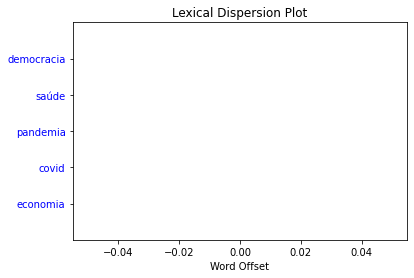

None
2020-03-04.txt


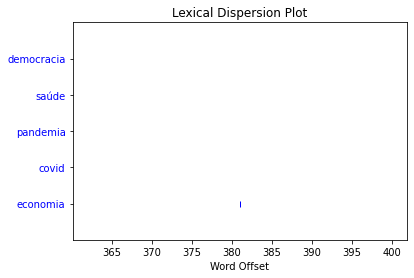

None
2020-03-09.txt


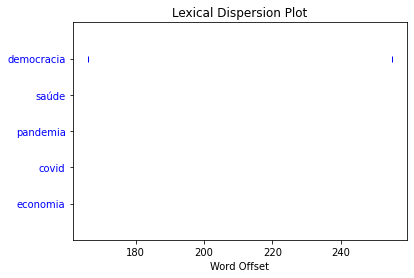

None
2020-03-10.txt


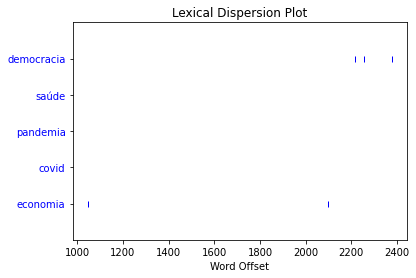

None
2020-04-17.txt


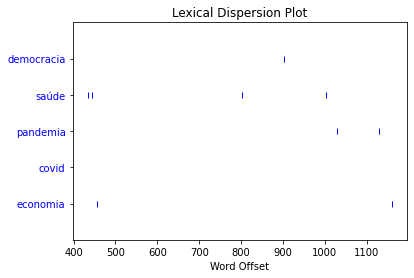

None
2020-04-24.txt


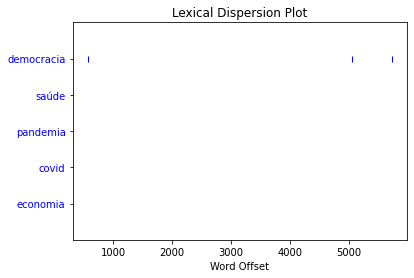

None
2020-04-29.txt


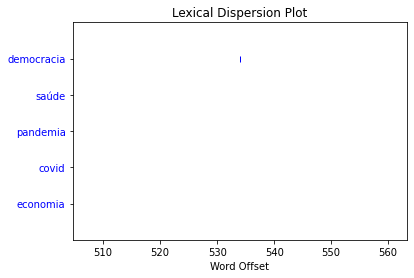

None
2020-05-21.txt


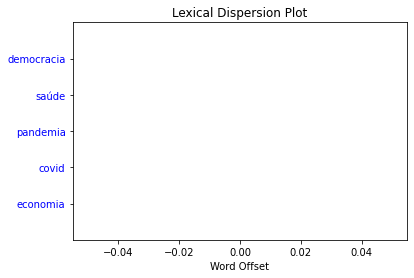

None
2020-06-05.txt


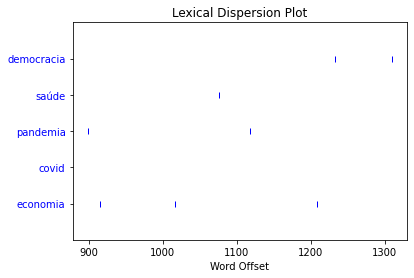

None
2020-06-08.txt


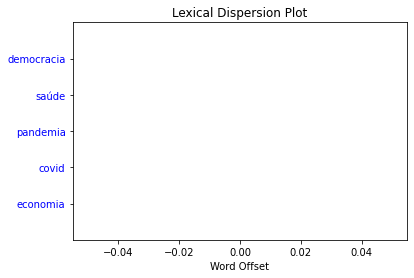

None
2020-06-09.txt


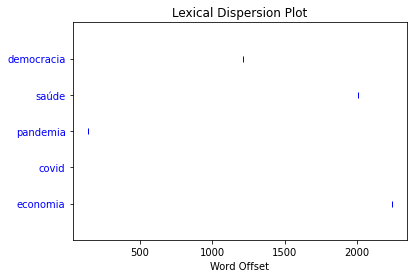

None
2020-06-17.txt


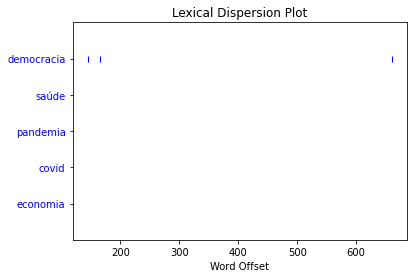

None
2020-06-22.txt


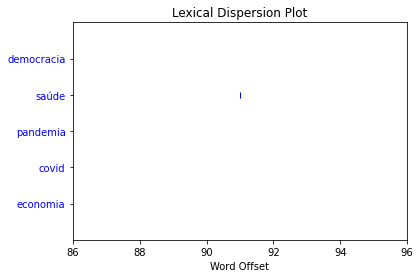

None
2020-06-25.txt


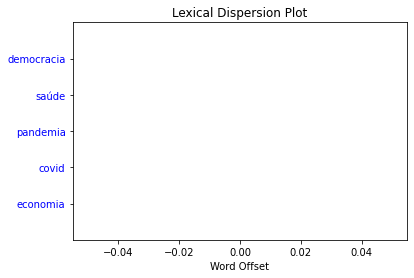

None
2020-06-30.txt


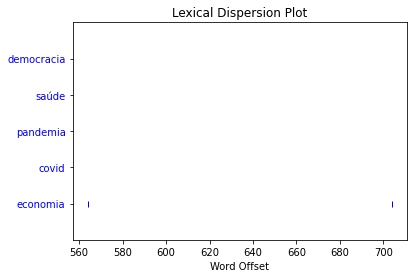

None
2020-07-02.txt


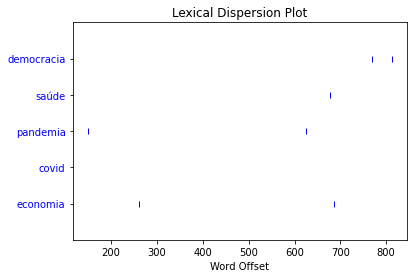

None
2020-07-16.txt


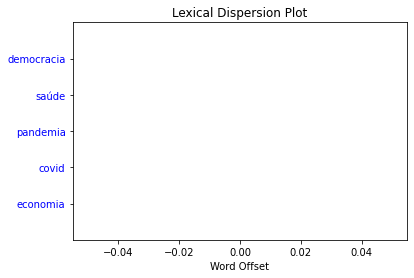

None
2020-07-30.txt


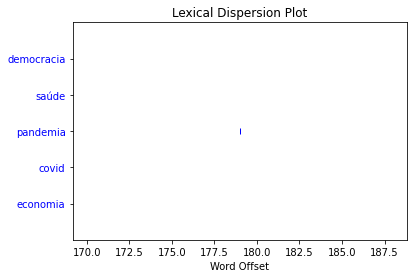

None
2020-07-31.txt


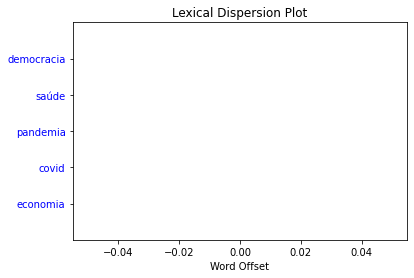

None
2020-08-05.txt


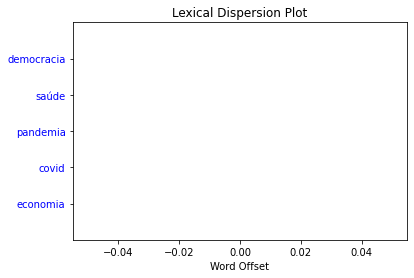

None
2020-08-06.txt


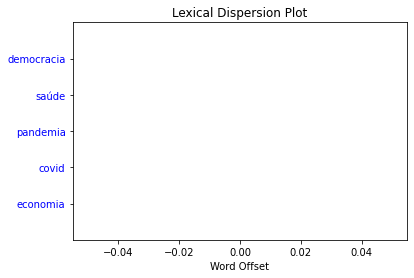

None
2020-08-11.txt


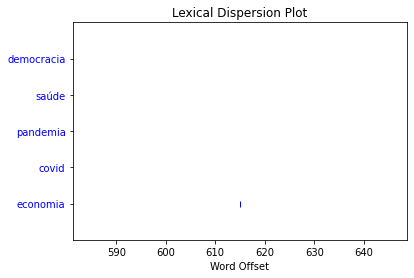

None
2020-08-12.txt


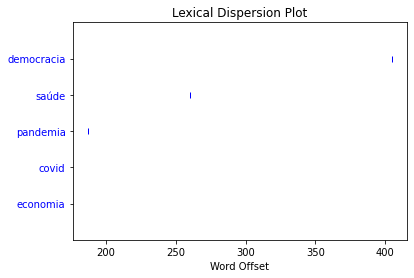

None
2020-08-13.txt


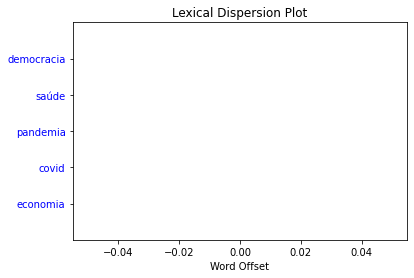

None
2020-08-14.txt


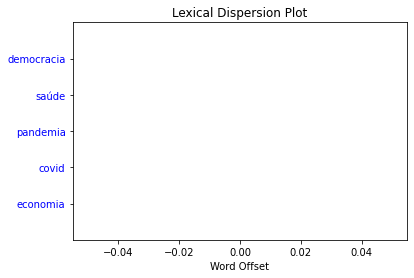

None
2020-08-15.txt


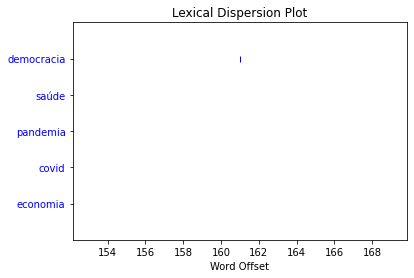

None
2020-08-17.txt


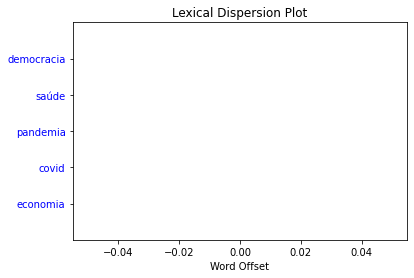

None
2020-08-18.txt


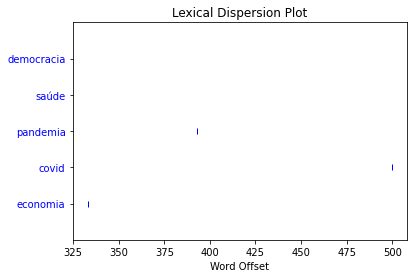

None
2020-08-19.txt


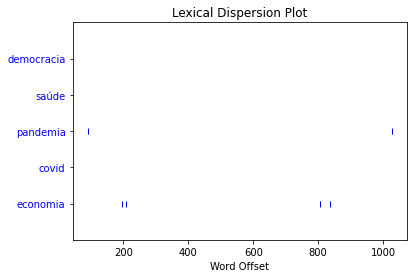

None
2020-08-21.txt


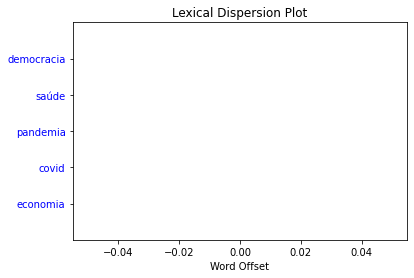

None
2020-08-24.txt


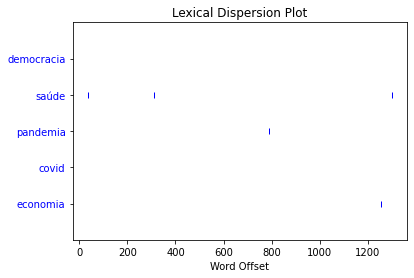

None
2020-08-25.txt


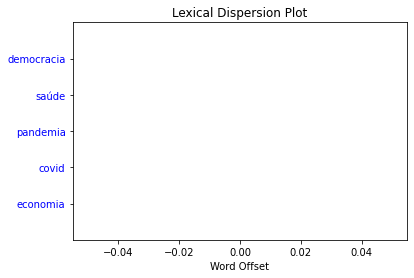

None
2020-08-26.txt


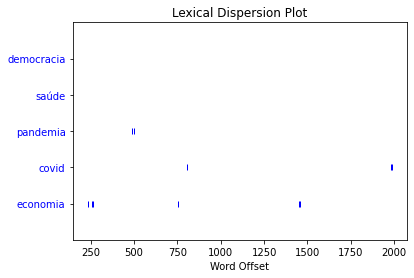

None
2020-08-27.txt


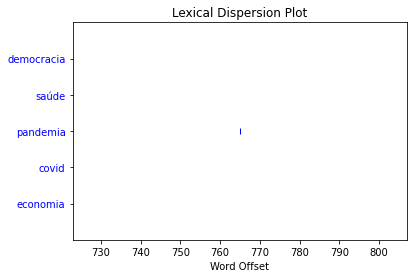

None
2020-08-29.txt


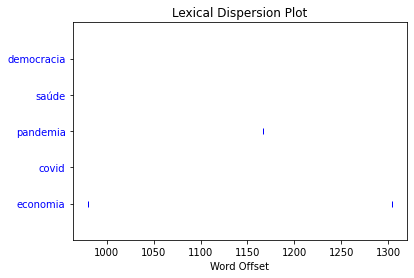

None
2020-09-01.txt


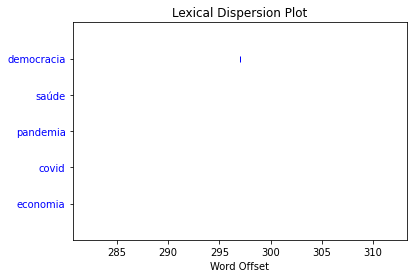

None
2020-09-02.txt


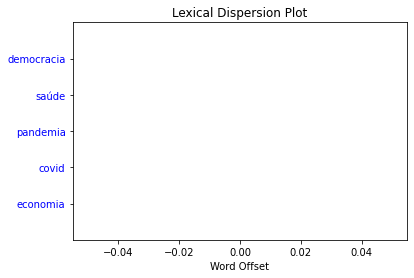

None
2020-09-03.txt


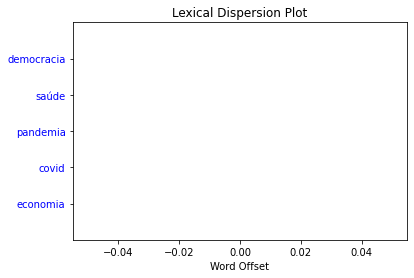

None
2020-09-10.txt


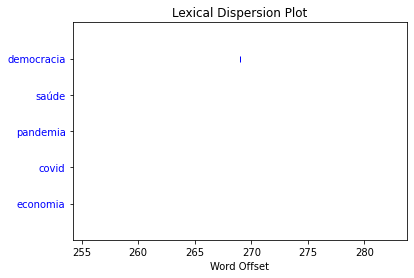

None
2020-09-11.txt


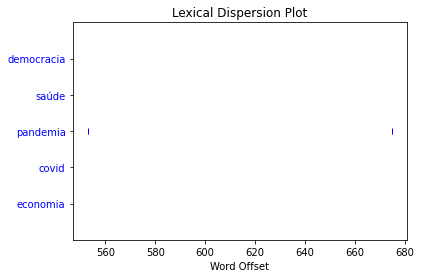

None
2020-09-16.txt


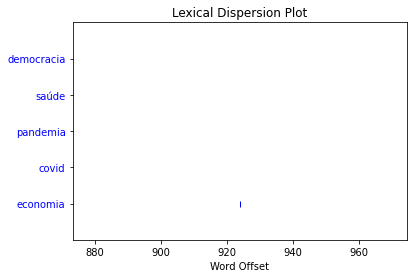

None
2020-09-17.txt


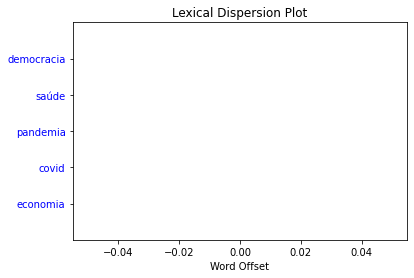

None
2020-09-18.txt


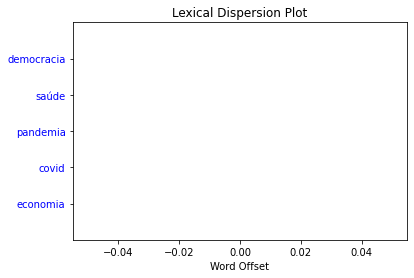

None
2020-09-19.txt


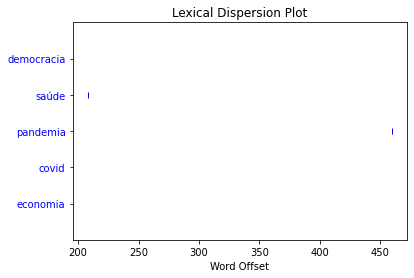

None
2020-09-22.txt


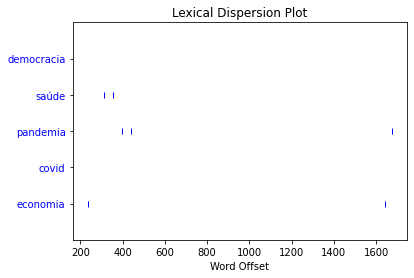

None


In [13]:
# Mostra a localização e dispersão das palavras 'democracia', 'saúde', 'pandemia', 'covid', 'economia'.

for text in texts:
    print(text["name"])
    print(text["content"].dispersion_plot(['democracia', 'saúde', 'pandemia', 'covid', 'economia']))

In [14]:
# Riqueza léxica dos discursos

sum_lexical_wealth = 0
for text in texts:
    print(text["name"])
    lexical_wealth = (len(set(text["content"])) / len(text["content"]) * 100)
    sum_lexical_wealth += lexical_wealth
    print("Riqueza léxica: {}%".format(lexical_wealth))

mid = sum_lexical_wealth/len(texts)
print("Média de riqueza léxica de todos os discursos: ", mid)

2020-03-03.txt
Riqueza léxica: 40.651965484180245%
2020-03-04.txt
Riqueza léxica: 43.01929625425653%
2020-03-09.txt
Riqueza léxica: 42.01520912547528%
2020-03-10.txt
Riqueza léxica: 31.625921614280173%
2020-04-17.txt
Riqueza léxica: 40.55118110236221%
2020-04-24.txt
Riqueza léxica: 25.499739266469668%
2020-04-29.txt
Riqueza léxica: 35.976331360946745%
2020-05-21.txt
Riqueza léxica: 38.2905982905983%
2020-06-05.txt
Riqueza léxica: 40.66161268090972%
2020-06-08.txt
Riqueza léxica: 52.21238938053098%
2020-06-09.txt
Riqueza léxica: 32.74662300450266%
2020-06-17.txt
Riqueza léxica: 44.05506883604506%
2020-06-22.txt
Riqueza léxica: 43.06167400881058%
2020-06-25.txt
Riqueza léxica: 50.0%
2020-06-30.txt
Riqueza léxica: 44.52466907340554%
2020-07-02.txt
Riqueza léxica: 50.0%
2020-07-16.txt
Riqueza léxica: 47.0668485675307%
2020-07-30.txt
Riqueza léxica: 47.465437788018434%
2020-07-31.txt
Riqueza léxica: 66.10169491525424%
2020-08-05.txt
Riqueza léxica: 49.25373134328358%
2020-08-06.txt
Riqueza 

In [15]:
# Contagem de frequência e porcentagem do texto ocupada por essas palavras:
#'democracia', 'saúde', 'pandemia', 'covid', 'economia'

for text in texts:
    print(text["name"])
    for word in ['democracia', 'saúde', 'pandemia', 'covid', 'economia']:
        word_count = text["content"].count(word)
        word_freq = 100 * (word_count / len(text["content"]))
        print("Palavra: {}\nContagem de frequência: {}\nPorcentagem do texto ocupada: {}%".format(word, word_count, word_freq))
        print("\n")

2020-03-03.txt
Palavra: democracia
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


Palavra: saúde
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


Palavra: pandemia
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


Palavra: covid
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


Palavra: economia
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


2020-03-04.txt
Palavra: democracia
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


Palavra: saúde
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


Palavra: pandemia
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


Palavra: covid
Contagem de frequência: 0
Porcentagem do texto ocupada: 0.0%


Palavra: economia
Contagem de frequência: 1
Porcentagem do texto ocupada: 0.11350737797956867%


2020-03-09.txt
Palavra: democracia
Contagem de frequência: 2
Porcentagem do texto ocupada: 0.19011406844106463%


Palavra: saúde
Contagem de frequência:

In [16]:
# Mostrar as collocations de cada discurso

for text in texts:
    print(text["name"])
    print(text["content"].collocations())
    print("\n")

2020-03-03.txt
Direitos Humanos; uma confissão; nossos irmãos; vamos adotá; falar
sobre; minha vida; Turismo também; minha esposa; temos qualquer; nosso
Ministério; nosso ministro; confissão aqui; quero fazer; não temos;
fazer uma; que pouco
None


2020-03-04.txt
tenho certeza; Regina Duarte; povo queria; quatro anos; muitas vezes;
sua alegria; nós temos; não tinha; temos que; você vai; não era;
certeza que; que foi; para nós; que nós; que você
None


2020-03-09.txt
Estados Unidos; Forças Armadas; vez mais; cada vez; muito feliz; Assim
sendo; que não; Estou muito; sua Pátria; suas Forças; para enfrentar;
governo que; que deve; nosso Brasil; mais nos; para que; uma grande;
que seja; para com
None


2020-03-10.txt
Estados Unidos; cada vez; Forças Armadas; vez mais; meu entender;
Parlamento brasileiro; Donald Trump; livre comércio; mundo todo; aos
poucos; nenhum funcionário; último sábado; nosso Brasil; partidos
políticos; terra indígena; todo respeito; seus problemas; senhor
Donald; esta

nós temos; aos poucos; Quer seja; gente humilde; grande parte; mais
uma; uma vez; bom para; demonstra que; que está; assim como; bem como;
seja com; nosso Brasil; que nós; para que
None


2020-09-16.txt
Paulo Guedes; naquele momento; comprovação científica; Quero
cumprimentar; alguma coisa; fossem contaminadas; ter sido; Jair
Bolsonaro; naquela época; pelo vírus; desse trabalho; pessoas fossem;
prezado general; nesse momento; para conter; uma solução; Também
falamos; por parte; juntamente com; nada mais
None


2020-09-17.txt
cada vez; meio ambiente; vez mais; Muito obrigado; quero cumprimentar;
nós sabemos; grande parte; nosso governo; conversando com; nos
empenhamos; não posso; seu meio; País que; nosso País; aqueles que;
que essa; que mais
None


2020-09-18.txt
toda certeza; com toda; ano passado; bastante cansado; menos difícil;
nós temos; Bom dia; segurança alimentar; segunda vez; para quem;
comprar esse; essa pessoa; povo maravilhoso; quem respeita; aquilo
que; bem como; fazer cam

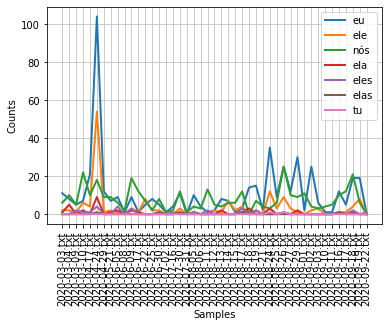

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
# Mostrar a frequência dos pronomes

cfd = nltk.ConditionalFreqDist((pal, fileid)
    for fileid in wordLists.fileids()
    for w in wordLists.words(fileid)
    for pal in ['eu', 'tu', 'ele', 'ela', 'nós', 'vós', 'eles', 'elas']
    if w.lower() == pal)
cfd.plot()